In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        plt.plot(r[0], label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
%load_ext autoreload
%autoreload 2

# Chapter 7 n-step TD Prediction

### 7.1 Use td(n) to estimate v(s)

code see [TDN](./c07_tdnpy#L11)

<img src="./avatar/c07_1.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 779 ms, sys: 32.2 ms, total: 811 ms
Wall time: 831 ms
CPU times: user 3.69 s, sys: 37.5 ms, total: 3.72 s
Wall time: 4.43 s
CPU times: user 1.64 s, sys: 8.66 ms, total: 1.65 s
Wall time: 1.88 s


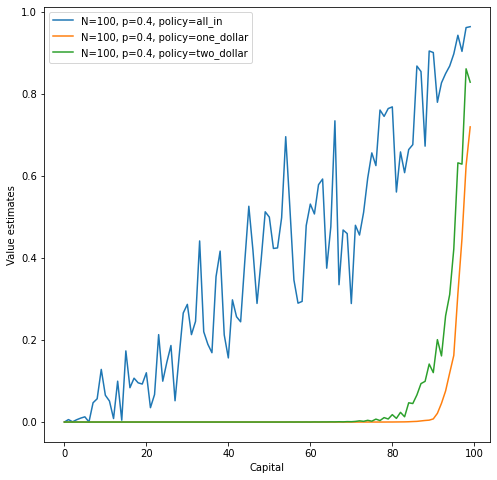

In [33]:
from c00_env import GamblerEnv, GamblerPolicy
from c07_tdn import TDN

env = GamblerEnv(N=100, p=0.4, include_terminate_state=False, seed=11)
tdn = TDN(env, n_steps=3)
%time v_1 = tdn.fit_v(policy=GamblerPolicy['all_in'], epochs=20000)
%time v_2 = tdn.fit_v(policy=GamblerPolicy['one_dollar'], epochs=2000)
%time v_3 = tdn.fit_v(policy=GamblerPolicy['two_dollar'], epochs=2000)

draw_gambler([
    (v_1, 'N={}, p={}, policy={}'.format(100, 0.4, 'all_in')),
    (v_2, 'N={}, p={}, policy={}'.format(100, 0.4, 'one_dollar')),
    (v_3, 'N={}, p={}, policy={}'.format(100, 0.4, 'two_dollar')),
])
